In [3]:
!pip install -q pandas_ta

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pandas_ta as ta
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 115.1/115.1 kB 9.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done


<style>
    p {
        font-family: 'Arial', sans-serif;
        font-size: 40px;
        background-color: yellow;
        color: red;
    }
</style>
<p >اپل تایم فریم روزانه</p>


<style>
    p {
        font-family: 'Arial', sans-serif;
        font-size: 30px;
        background-color: #C1CE87;
        color: red;
    }
</style>
<p >خواندن داده bitcoin</p>

In [5]:
from google.colab import files
uploaded = files.upload()


Saving Bitcoin-Daily.csv to Bitcoin-Daily (1).csv


In [6]:
import pandas as pd

bitcoin_d = pd.read_csv("Bitcoin-Daily.csv")
bitcoin_d.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2020-01-01,7194.892090,7254.330566,7174.944336,7200.174316,7200.174316,18565664997
1,2020-01-02,7202.551270,7212.155273,6935.270020,6985.470215,6985.470215,20802083465
2,2020-01-03,6984.428711,7413.715332,6914.996094,7344.884277,7344.884277,28111481032
3,2020-01-04,7345.375488,7427.385742,7309.514160,7410.656738,7410.656738,18444271275
4,2020-01-05,7410.451660,7544.497070,7400.535645,7411.317383,7411.317383,19725074095


<style>
    p {
        font-family: 'Arial', sans-serif;
        font-size: 30px;
        background-color: #C1CE87;
        color: red;
    }
</style>
<p >خواندن داده اپل</p>

In [8]:
from google.colab import files
uploaded = files.upload()

Saving Day-Apple.csv to Day-Apple.csv


In [9]:
import pandas as pd
apple_d = pd.read_csv("Day-Apple.csv")
apple_d.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2020-01-02,74.059998,75.150002,73.797501,75.087502,72.960480,135480400
1,2020-01-03,74.287498,75.144997,74.125000,74.357498,72.251152,146322800
2,2020-01-06,73.447502,74.989998,73.187500,74.949997,72.826866,118387200
3,2020-01-07,74.959999,75.224998,74.370003,74.597504,72.484352,108872000
4,2020-01-08,74.290001,76.110001,74.290001,75.797501,73.650360,132079200


In [11]:
bitcoin_d.shape, apple_d.shape

((1609, 7), (1102, 7))

<style>
    p {
        font-family: 'Arial', sans-serif;
        font-size: 30px;
        background-color: #C1CE87;
        color: red;
    }
</style>
<p >افزودن قیمت پایانی و حجم بیت کوین به اپل بر اساس ستون تاریخ</p>

In [12]:
bitcoin_d.set_index('Date', inplace= True)
apple_d.set_index('Date', inplace=True)
apple_d['bit_close'] = bitcoin_d['Close']
apple_d['bit_volume'] = bitcoin_d['Volume']
apple_d.drop(['Open','High','Low','Adj Close'], axis=1,inplace= True)
apple_d.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1102 entries, 2020-01-02 to 2024-05-17
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Close       1102 non-null   float64
 1   Volume      1102 non-null   int64  
 2   bit_close   1102 non-null   float64
 3   bit_volume  1102 non-null   int64  
dtypes: float64(2), int64(2)
memory usage: 43.0+ KB


In [13]:
apple_d.head()

,Close,Volume,bit_close,bit_volume
Date,,,,
2020-01-02,75.087502,135480400,6985.470215,20802083465
2020-01-03,74.357498,146322800,7344.884277,28111481032
2020-01-06,74.949997,118387200,7769.219238,23276261598
2020-01-07,74.597504,108872000,8163.692383,28767291327
2020-01-08,75.797501,132079200,8079.862793,31672559265


<style>
    p {
        font-family: 'Arial', sans-serif;
        font-size: 30px;
        background-color: #C1CE87;
        color: red;
    }
</style>
<p >محاسبه شاخص های مالی</p>

In [14]:
apple_d.ta.rsi(close = apple_d['Close'], length= 14, append = True)
apple_d.ta.sma(close = apple_d['Close'], length= 14, append = True)
apple_d.ta.sma(close = apple_d['Close'], length= 28, append = True)
apple_d

,Close,Volume,bit_close,bit_volume,RSI_14,SMA_14,SMA_28
Date,,,,,,,
2020-01-02,75.087502,135480400,6985.470215,20802083465,NaN,NaN,NaN
2020-01-03,74.357498,146322800,7344.884277,28111481032,NaN,NaN,NaN
2020-01-06,74.949997,118387200,7769.219238,23276261598,NaN,NaN,NaN
2020-01-07,74.597504,108872000,8163.692383,28767291327,NaN,NaN,NaN
2020-01-08,75.797501,132079200,8079.862793,31672559265,NaN,NaN,NaN
...,...,...,...,...,...,...,...
2024-05-13,186.279999,72044800,62901.449219,27889181179,67.279970,177.035716,173.187144
2024-05-14,187.429993,52393600,61552.789062,28186271527,68.494281,178.350716,173.851786
2024-05-15,189.720001,70400000,66267.492188,39815167074,70.816881,179.767144,174.571072


In [15]:
apple_d.dropna(axis=0, inplace=True)
apple_d.head()

,Close,Volume,bit_close,bit_volume,RSI_14,SMA_14,SMA_28
Date,,,,,,,
2020-02-11,79.902496,94323200,10208.236328,37648059389,55.095035,79.593929,78.442857
2020-02-12,81.800003,113730400,10326.054688,43444303830,61.262647,79.736250,78.682589
2020-02-13,81.217499,94747600,10214.379883,49356071373,58.601717,79.853393,78.927589
2020-02-14,81.237503,80113600,10312.116211,43338264162,58.668111,80.139107,79.152143
2020-02-18,79.750000,152531200,10141.996094,47271023953,51.990886,80.162500,79.336161


<style>
    p {
        font-family: 'Arial', sans-serif;
        font-size: 30px;
        background-color: #C1CE87;
        color: red;
    }
</style>
<p >تعریف سیگنال خرید یا فروش</p>

In [16]:
apple_d['buy_signal_rsi'] = (apple_d['RSI_14'] >= 70).astype('int')
apple_d['sell_signal_rsi'] = (apple_d['RSI_14'] <= 30).astype('int')
apple_d

,Close,Volume,bit_close,bit_volume,RSI_14,SMA_14,SMA_28,buy_signal_rsi,sell_signal_rsi
Date,,,,,,,,,
2020-02-11,79.902496,94323200,10208.236328,37648059389,55.095035,79.593929,78.442857,0,0
2020-02-12,81.800003,113730400,10326.054688,43444303830,61.262647,79.736250,78.682589,0,0
2020-02-13,81.217499,94747600,10214.379883,49356071373,58.601717,79.853393,78.927589,0,0
2020-02-14,81.237503,80113600,10312.116211,43338264162,58.668111,80.139107,79.152143,0,0
2020-02-18,79.750000,152531200,10141.996094,47271023953,51.990886,80.162500,79.336161,0,0
...,...,...,...,...,...,...,...,...,...
2024-05-13,186.279999,72044800,62901.449219,27889181179,67.279970,177.035716,173.187144,0,0
2024-05-14,187.429993,52393600,61552.789062,28186271527,68.494281,178.350716,173.851786,0,0
2024-05-15,189.720001,70400000,66267.492188,39815167074,70.816881,179.767144,174.571072,1,0


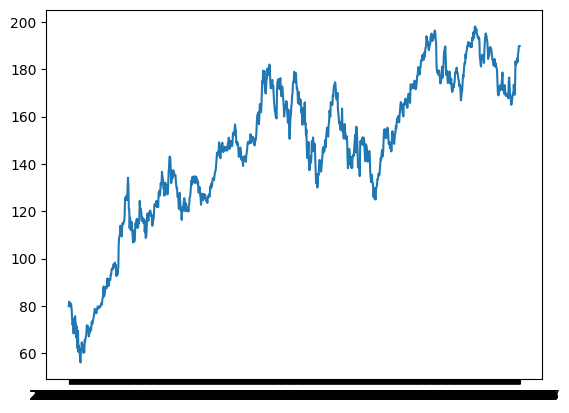

In [17]:
plt.plot(apple_d.Close)

In [18]:
sum(apple_d['sell_signal_rsi']), sum(apple_d['buy_signal_rsi'])

(18, 98)

In [19]:
# apple_d['target'] = apple_d['Close'].shift(-1)
# apple_d.rename(columns={'Close':'today_close'}, inplace=True)
# apple_d.dropna(axis=0, inplace=True)
apple_d

,Close,Volume,bit_close,bit_volume,RSI_14,SMA_14,SMA_28,buy_signal_rsi,sell_signal_rsi
Date,,,,,,,,,
2020-02-11,79.902496,94323200,10208.236328,37648059389,55.095035,79.593929,78.442857,0,0
2020-02-12,81.800003,113730400,10326.054688,43444303830,61.262647,79.736250,78.682589,0,0
2020-02-13,81.217499,94747600,10214.379883,49356071373,58.601717,79.853393,78.927589,0,0
2020-02-14,81.237503,80113600,10312.116211,43338264162,58.668111,80.139107,79.152143,0,0
2020-02-18,79.750000,152531200,10141.996094,47271023953,51.990886,80.162500,79.336161,0,0
...,...,...,...,...,...,...,...,...,...
2024-05-13,186.279999,72044800,62901.449219,27889181179,67.279970,177.035716,173.187144,0,0
2024-05-14,187.429993,52393600,61552.789062,28186271527,68.494281,178.350716,173.851786,0,0
2024-05-15,189.720001,70400000,66267.492188,39815167074,70.816881,179.767144,174.571072,1,0


<style>
    p {
        font-family: 'Arial', sans-serif;
        font-size: 30px;
        background-color: #C1CE87;
        color: red;
    }
</style>
<p >ساخت داده آموزشی و داده تست </p>

In [20]:
x_scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = x_scaler.fit_transform(apple_d.iloc[:,1:])
y_scaler = MinMaxScaler(feature_range=(0, 1))
target = y_scaler.fit_transform(apple_d.iloc[:,0].values.reshape(-1,1))


def create_sequences(data, seq_length, close_index = 0):
    xs, ys = [], []
    for i in range(len(data)-seq_length):
        x = data[i:i+seq_length]
        y = data[i+seq_length, close_index]
        xs.append(x)
        ys.append(y)
    return np.array(xs), np.array(ys)

seq_length = 30
data = np.hstack([target,scaled_data])
X, y = create_sequences(data, seq_length)


TEST_SIZE = 0.2
split_index = int(len(X)*(1-TEST_SIZE))
X_train, X_test = X[:split_index,:], X[split_index:,:]
y_train, y_test = y[:split_index], y[split_index:]

X_train.shape, X_test.shape

((836, 30, 9), (209, 30, 9))

In [21]:
X_train[1].shape

(30, 9)

In [22]:
import torch
torch.cuda.is_available()

True

In [23]:
device = 'cuda' if torch.cuda.is_available() else 'cpu'
device

'cuda'

In [24]:
import torch
import torch.nn as nn
from torch.utils.data import DataLoader, TensorDataset
from torch.optim.lr_scheduler import StepLR

device = 'cuda' if torch.cuda.is_available() else 'cpu'

train_data = TensorDataset(torch.from_numpy(X_train).float(), torch.from_numpy(y_train).float())
test_data = TensorDataset(torch.from_numpy(X_test).float(), torch.from_numpy(y_test).float())

train_loader = DataLoader(train_data, batch_size=32, shuffle=False)
test_loader = DataLoader(test_data, batch_size=32, shuffle=False)



class LSTMModel(nn.Module):
    def __init__(self, input_size, hidden_size, num_layers, output_size):
        super(LSTMModel, self).__init__()
        self.hidden_size = hidden_size
        self.num_layers = num_layers
        self.lstm = nn.LSTM(input_size, hidden_size, num_layers, batch_first=True)
        self.fc = nn.Linear(hidden_size, output_size)

    def forward(self, x):
        h0 = torch.zeros(self.num_layers, x.size(0), self.hidden_size).to(x.device)
        c0 = torch.zeros(self.num_layers, x.size(0), self.hidden_size).to(x.device)
        out, _ = self.lstm(x, (h0, c0))
        out = self.fc(out[:, -1, :])
        return out


input_size = X_train.shape[2]
hidden_size = 20
num_layers = 2
output_size = 1
num_epochs = 500
learning_rate = 0.01

lstm_losses = []
model = LSTMModel(input_size, hidden_size, num_layers, output_size).to(device)
criterion = nn.MSELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)
scheduler = StepLR(optimizer, step_size=100, gamma=0.5)

for epoch in range(num_epochs):
    epoch_loss = 0
    for inputs, targets in train_loader:
        inputs, targets = inputs.to(device), targets.to(device)
        outputs = model(inputs)
        loss = criterion(outputs, targets.unsqueeze(1))
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        epoch_loss += loss.item()
    scheduler.step()

    avg_epoch_loss = epoch_loss / len(train_loader)
    lstm_losses.append(avg_epoch_loss)
    print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {avg_epoch_loss:.4f}')



Epoch [1/500], Loss: 0.0310
Epoch [2/500], Loss: 0.0409
Epoch [3/500], Loss: 0.0537
Epoch [4/500], Loss: 0.0425
Epoch [5/500], Loss: 0.0252
Epoch [6/500], Loss: 0.0214
Epoch [7/500], Loss: 0.0246
Epoch [8/500], Loss: 0.0150
Epoch [9/500], Loss: 0.0116
Epoch [10/500], Loss: 0.0088
Epoch [11/500], Loss: 0.0070
Epoch [12/500], Loss: 0.0049
Epoch [13/500], Loss: 0.0051
Epoch [14/500], Loss: 0.0030
Epoch [15/500], Loss: 0.0050
Epoch [16/500], Loss: 0.0023
Epoch [17/500], Loss: 0.0022
Epoch [18/500], Loss: 0.0020
Epoch [19/500], Loss: 0.0041
Epoch [20/500], Loss: 0.0018
Epoch [21/500], Loss: 0.0025
Epoch [22/500], Loss: 0.0033
Epoch [23/500], Loss: 0.0068
Epoch [24/500], Loss: 0.0043
Epoch [25/500], Loss: 0.0040
Epoch [26/500], Loss: 0.0059
Epoch [27/500], Loss: 0.0116
Epoch [28/500], Loss: 0.0068
Epoch [29/500], Loss: 0.0062
Epoch [30/500], Loss: 0.0031
Epoch [31/500], Loss: 0.0052
Epoch [32/500], Loss: 0.0032
Epoch [33/500], Loss: 0.0045
Epoch [34/500], Loss: 0.0029
Epoch [35/500], Loss: 0

In [25]:
class BiRNNModel(nn.Module):
    def __init__(self, input_size, hidden_size, num_layers, output_size):
        super(BiRNNModel, self).__init__()
        self.hidden_size = hidden_size
        self.num_layers = num_layers
        self.rnn = nn.RNN(input_size, hidden_size, num_layers, batch_first=True, bidirectional=True)
        self.fc = nn.Linear(hidden_size * 2, output_size)

    def forward(self, x):
        h0 = torch.zeros(self.num_layers * 2, x.size(0), self.hidden_size).to(x.device)
        out, _ = self.rnn(x, h0)
        out = self.fc(out[:, -1, :])
        return out

input_size = X_train.shape[2]
hidden_size = 20
num_layers = 2
output_size = 1
num_epochs = 500
learning_rate = 0.01

bi_rnn_losses = []

bi_model = BiRNNModel(input_size, hidden_size, num_layers, output_size).to(device)
criterion = nn.MSELoss()
optimizer = torch.optim.Adam(bi_model.parameters(), lr=learning_rate)
scheduler = StepLR(optimizer, step_size=100, gamma=0.2)

for epoch in range(num_epochs):
    epoch_loss = 0
    for inputs, targets in train_loader:
        inputs, targets = inputs.to(device), targets.to(device)
        outputs = bi_model(inputs)
        loss = criterion(outputs, targets.unsqueeze(1))
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        epoch_loss += loss.item()
    scheduler.step()

    avg_epoch_loss = epoch_loss / len(train_loader)
    bi_rnn_losses.append(avg_epoch_loss)
    print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {avg_epoch_loss:.4f}')


Epoch [1/500], Loss: 0.0154
Epoch [2/500], Loss: 0.0541
Epoch [3/500], Loss: 0.0245
Epoch [4/500], Loss: 0.0233
Epoch [5/500], Loss: 0.0348
Epoch [6/500], Loss: 0.0362
Epoch [7/500], Loss: 0.0371
Epoch [8/500], Loss: 0.0176
Epoch [9/500], Loss: 0.0088
Epoch [10/500], Loss: 0.0357
Epoch [11/500], Loss: 0.0143
Epoch [12/500], Loss: 0.0452
Epoch [13/500], Loss: 0.0201
Epoch [14/500], Loss: 0.0059
Epoch [15/500], Loss: 0.0308
Epoch [16/500], Loss: 0.0209
Epoch [17/500], Loss: 0.0073
Epoch [18/500], Loss: 0.0044
Epoch [19/500], Loss: 0.0134
Epoch [20/500], Loss: 0.0122
Epoch [21/500], Loss: 0.0112
Epoch [22/500], Loss: 0.0058
Epoch [23/500], Loss: 0.0288
Epoch [24/500], Loss: 0.0425
Epoch [25/500], Loss: 0.0163
Epoch [26/500], Loss: 0.0074
Epoch [27/500], Loss: 0.0276
Epoch [28/500], Loss: 0.0111
Epoch [29/500], Loss: 0.0176
Epoch [30/500], Loss: 0.0290
Epoch [31/500], Loss: 0.0351
Epoch [32/500], Loss: 0.0402
Epoch [33/500], Loss: 0.0375
Epoch [34/500], Loss: 0.0087
Epoch [35/500], Loss: 0

In [26]:
def evaluate_model(model, test_loader):
    model.eval()
    with torch.no_grad():
        predictions, actuals = [], []
        for inputs, targets in test_loader:
            inputs, targets = inputs.to(device), targets.to(device)
            outputs = model(inputs)
            outputs = y_scaler.inverse_transform(outputs.to('cpu').numpy().reshape(-1,1))
            predictions.append(outputs)
            targets = y_scaler.inverse_transform(targets.to('cpu').numpy().reshape(-1,1))
            actuals.append(targets)
    return np.concatenate(predictions), np.concatenate(actuals)

lstm_predictions, lstm_actuals = evaluate_model(model, test_loader)
lstm_mse = np.mean((lstm_predictions - lstm_actuals)**2)
print(f'LSTM Model MSE: {lstm_mse:.4f}')

bi_rnn_predictions, bi_rnn_actuals = evaluate_model(bi_model, test_loader)
bi_rnn_mse = np.mean((bi_rnn_predictions - bi_rnn_actuals)**2)
print(f'Bidirectional RNN Model MSE: {bi_rnn_mse:.4f}')


LSTM Model MSE: 27.7591
Bidirectional RNN Model MSE: 14.9183


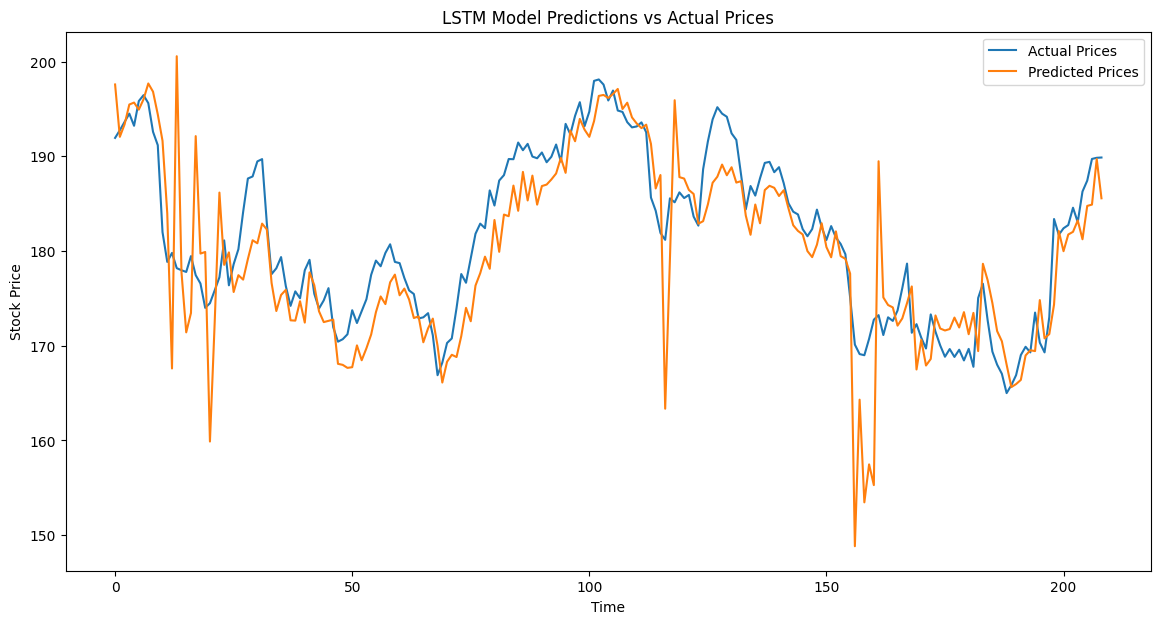

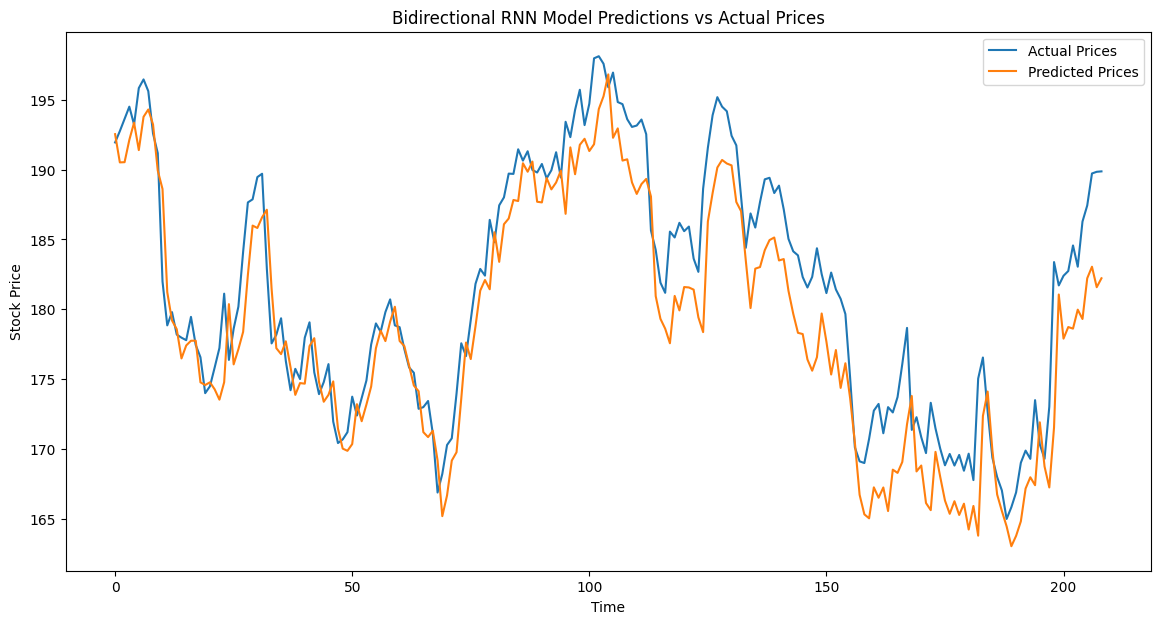

In [27]:
import matplotlib.pyplot as plt

def plot_predictions(actual, predictions, title):
    plt.figure(figsize=(14, 7))
    plt.plot(actual, label='Actual Prices')
    plt.plot(predictions, label='Predicted Prices')
    plt.title(title)
    plt.xlabel('Time')
    plt.ylabel('Stock Price')
    plt.legend()
    plt.show()


plot_predictions(lstm_actuals, lstm_predictions, 'LSTM Model Predictions vs Actual Prices')

plot_predictions(bi_rnn_actuals, bi_rnn_predictions, 'Bidirectional RNN Model Predictions vs Actual Prices')


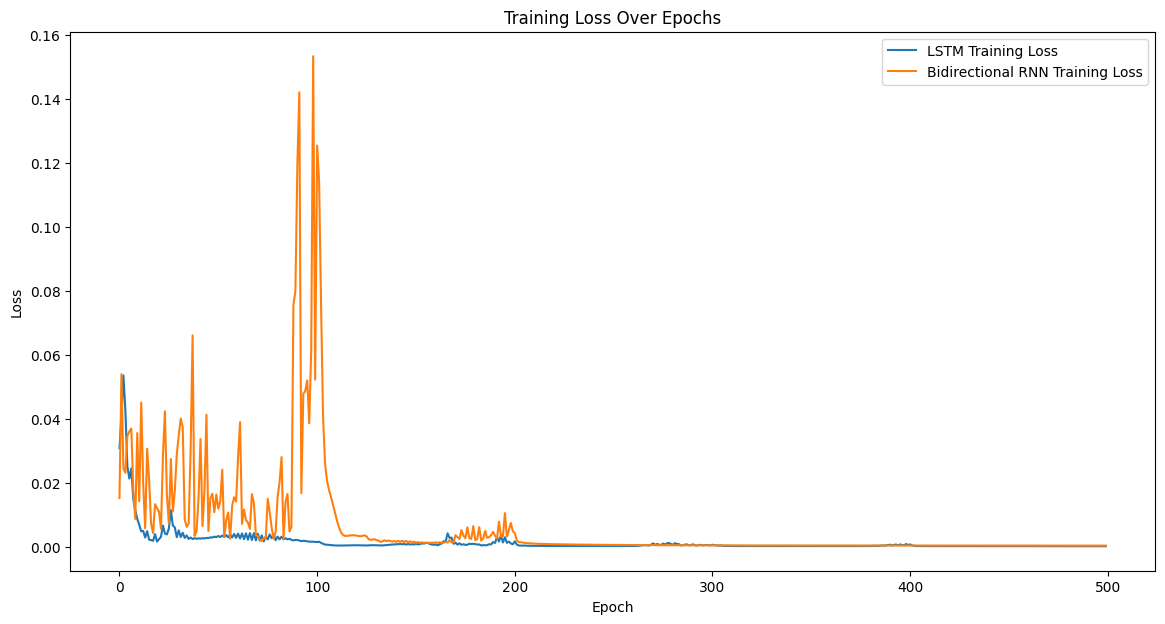

In [28]:
def plot_losses(lstm_losses, bi_rnn_losses):
    plt.figure(figsize=(14, 7))
    plt.plot(lstm_losses, label='LSTM Training Loss')
    plt.plot(bi_rnn_losses, label='Bidirectional RNN Training Loss')
    plt.title('Training Loss Over Epochs')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend()
    plt.show()

plot_losses(lstm_losses, bi_rnn_losses)


<style>
    p {
        font-family: 'Arial', sans-serif;
        font-size: 40px;
        background-color: yellow;
        color: red;
    }
</style>
<p >اپل تایم فریم ماهانه</p>

In [30]:
from google.colab import files
uploaded = files.upload()


Saving Bitcoin-Monthly.csv to Bitcoin-Monthly.csv


In [31]:
from google.colab import files
uploaded = files.upload()

Saving Monthly-Apple.csv to Monthly-Apple.csv


In [32]:
import pandas as pd

bitcoin_d = pd.read_csv("Bitcoin-Monthly.csv")
apple_d = pd.read_csv("Monthly-Apple.csv")

apple_d.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2020-01-31,77.792738,78.581547,77.207857,77.979048,75.770100,1.397319e+08
1,2020-02-29,77.578421,78.813158,76.681579,77.817631,75.754041,1.589094e+08
2,2020-03-31,65.268410,67.423181,63.711591,65.611023,63.903731,2.854578e+08
3,2020-04-30,67.952857,68.945357,67.021072,68.096547,66.324580,1.554904e+08
4,2020-05-31,77.221375,78.312875,76.595250,77.496376,75.635223,1.402968e+08


In [33]:
bitcoin_d.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2020-01-01,7194.892090,9553.125977,6914.996094,9350.529297,9350.529297,852872174496
1,2020-02-01,9346.357422,10457.626953,8492.932617,8599.508789,8599.508789,1163376492768
2,2020-03-01,8599.758789,9167.695312,4106.980957,6438.644531,6438.644531,1290442059648
3,2020-04-01,6437.319336,9440.650391,6202.373535,8658.553711,8658.553711,1156127164831
4,2020-05-01,8672.782227,9996.743164,8374.323242,9461.058594,9461.058594,1286368141507


In [34]:
from datetime import timedelta
apple_d['Date'] = pd.to_datetime(apple_d['Date']) + np.full((len(apple_d['Date']),), timedelta(1))
apple_d.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2020-02-01 00:00:00,77.792738,78.581547,77.207857,77.979048,75.770100,1.397319e+08
1,2020-03-01 00:00:00,77.578421,78.813158,76.681579,77.817631,75.754041,1.589094e+08
2,2020-04-01 00:00:00,65.268410,67.423181,63.711591,65.611023,63.903731,2.854578e+08
3,2020-05-01 00:00:00,67.952857,68.945357,67.021072,68.096547,66.324580,1.554904e+08
4,2020-06-01 00:00:00,77.221375,78.312875,76.595250,77.496376,75.635223,1.402968e+08


In [35]:
bitcoin_d['Date'] = pd.to_datetime(bitcoin_d['Date'])
bitcoin_d.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2020-01-01,7194.892090,9553.125977,6914.996094,9350.529297,9350.529297,852872174496
1,2020-02-01,9346.357422,10457.626953,8492.932617,8599.508789,8599.508789,1163376492768
2,2020-03-01,8599.758789,9167.695312,4106.980957,6438.644531,6438.644531,1290442059648
3,2020-04-01,6437.319336,9440.650391,6202.373535,8658.553711,8658.553711,1156127164831
4,2020-05-01,8672.782227,9996.743164,8374.323242,9461.058594,9461.058594,1286368141507


In [36]:
bitcoin_d.set_index('Date', inplace= True)
apple_d.set_index('Date', inplace=True)
apple_d['bit_close'] = bitcoin_d['Close']
apple_d['bit_volume'] = bitcoin_d['Volume']
apple_d.drop(['Open','High','Low','Adj Close'], axis=1,inplace= True)
apple_d.ta.rsi(close = apple_d['Close'], length= 14, append = True)
apple_d.ta.sma(close = apple_d['Close'], length= 14, append = True)
apple_d.ta.sma(close = apple_d['Close'], length= 28, append = True)
apple_d.dropna(axis=0, inplace=True)
apple_d['buy_signal_rsi'] = (apple_d['RSI_14'] >= 70).astype('int')
apple_d['sell_signal_rsi'] = (apple_d['RSI_14'] <= 30).astype('int')
apple_d.head()

/usr/local/lib/python3.11/dist-packages/pandas/core/indexes/base.py:7588: FutureWarning: Dtype inference on a pandas object (Series, Index, ExtensionArray) is deprecated. The Index constructor will keep the original dtype in the future. Call `infer_objects` on the result to get the old behavior.
  return Index(sequences[0], name=names)


,Close,Volume,bit_close,bit_volume,RSI_14,SMA_14,SMA_28,buy_signal_rsi,sell_signal_rsi
Date,,,,,,,,,
2022-05-01,166.820999,8.438978e+07,31792.310547,1.105689e+12,74.906573,149.803245,125.135248,1,0
2022-06-01,148.430477,1.143353e+08,19784.726562,9.239392e+11,58.594588,151.700329,127.651371,0,0
2022-07-01,139.798573,8.329047e+07,23336.896484,9.275824e+11,52.784406,152.270737,129.864976,0,0
2022-08-01,149.670499,7.235627e+07,20049.763672,8.941927e+11,57.923134,153.905487,132.867100,0,0
2022-09-01,166.885218,6.566259e+07,19431.789062,1.123272e+12,65.063661,156.543100,136.395267,0,0


In [37]:
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(apple_d)


def create_sequences(data, seq_length, close_index = 0):
    xs, ys = [], []
    for i in range(len(data)-seq_length):
        x = data[i:i+seq_length]
        y = data[i+seq_length, close_index]
        xs.append(x)
        ys.append(y)
    return np.array(xs), np.array(ys)

seq_length = 5
X, y = create_sequences(scaled_data, seq_length)


TEST_SIZE = 0.2
split_index = int(len(X)*(1-TEST_SIZE))
X_train, X_test = X[:split_index,:], X[split_index:,:]
y_train, y_test = y[:split_index], y[split_index:]

X_train.shape, X_test.shape

((16, 5, 9), (4, 5, 9))

In [38]:
import torch
import torch.nn as nn
from torch.utils.data import DataLoader, TensorDataset


train_data = TensorDataset(torch.from_numpy(X_train).float(), torch.from_numpy(y_train).float())
test_data = TensorDataset(torch.from_numpy(X_test).float(), torch.from_numpy(y_test).float())

train_loader = DataLoader(train_data, batch_size=5, shuffle=False)
test_loader = DataLoader(test_data, batch_size=5, shuffle=False)


class LSTMModel(nn.Module):
    def __init__(self, input_size, hidden_size, num_layers, output_size):
        super(LSTMModel, self).__init__()
        self.hidden_size = hidden_size
        self.num_layers = num_layers
        self.lstm = nn.LSTM(input_size, hidden_size, num_layers, batch_first=True)
        self.fc = nn.Linear(hidden_size, output_size)

    def forward(self, x):
        h0 = torch.zeros(self.num_layers, x.size(0), self.hidden_size).to(x.device)
        c0 = torch.zeros(self.num_layers, x.size(0), self.hidden_size).to(x.device)
        out, _ = self.lstm(x, (h0, c0))
        out = self.fc(out[:, -1, :])
        return out


input_size = X_train.shape[2]
hidden_size = 100
num_layers = 2
output_size = 1
num_epochs = 300
learning_rate = 0.001

lstm_losses = []
model = LSTMModel(input_size, hidden_size, num_layers, output_size)
criterion = nn.MSELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)

for epoch in range(num_epochs):
    epoch_loss = 0
    for inputs, targets in train_loader:
        outputs = model(inputs)
        loss = criterion(outputs, targets.unsqueeze(1))
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        epoch_loss += loss.item()

    avg_epoch_loss = epoch_loss / len(train_loader)
    lstm_losses.append(avg_epoch_loss)
    print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {avg_epoch_loss:.4f}')

Epoch [1/300], Loss: 0.4978
Epoch [2/300], Loss: 0.3503
Epoch [3/300], Loss: 0.2010
Epoch [4/300], Loss: 0.0822
Epoch [5/300], Loss: 0.0904
Epoch [6/300], Loss: 0.1251
Epoch [7/300], Loss: 0.1042
Epoch [8/300], Loss: 0.0878
Epoch [9/300], Loss: 0.0747
Epoch [10/300], Loss: 0.0588
Epoch [11/300], Loss: 0.0487
Epoch [12/300], Loss: 0.0475
Epoch [13/300], Loss: 0.0436
Epoch [14/300], Loss: 0.0371
Epoch [15/300], Loss: 0.0320
Epoch [16/300], Loss: 0.0287
Epoch [17/300], Loss: 0.0283
Epoch [18/300], Loss: 0.0274
Epoch [19/300], Loss: 0.0266
Epoch [20/300], Loss: 0.0255
Epoch [21/300], Loss: 0.0246
Epoch [22/300], Loss: 0.0237
Epoch [23/300], Loss: 0.0229
Epoch [24/300], Loss: 0.0220
Epoch [25/300], Loss: 0.0213
Epoch [26/300], Loss: 0.0206
Epoch [27/300], Loss: 0.0199
Epoch [28/300], Loss: 0.0192
Epoch [29/300], Loss: 0.0185
Epoch [30/300], Loss: 0.0178
Epoch [31/300], Loss: 0.0171
Epoch [32/300], Loss: 0.0164
Epoch [33/300], Loss: 0.0157
Epoch [34/300], Loss: 0.0150
Epoch [35/300], Loss: 0

In [39]:
# Define Bidirectional RNN model
class BiRNNModel(nn.Module):
    def __init__(self, input_size, hidden_size, num_layers, output_size):
        super(BiRNNModel, self).__init__()
        self.hidden_size = hidden_size
        self.num_layers = num_layers
        self.rnn = nn.RNN(input_size, hidden_size, num_layers, batch_first=True, bidirectional=True)
        self.fc = nn.Linear(hidden_size * 2, output_size)

    def forward(self, x):
        h0 = torch.zeros(self.num_layers * 2, x.size(0), self.hidden_size).to(x.device)
        out, _ = self.rnn(x, h0)
        out = self.fc(out[:, -1, :])
        return out

bi_rnn_losses = []
bi_model = BiRNNModel(input_size, hidden_size, num_layers, output_size)
criterion = nn.MSELoss()
optimizer = torch.optim.Adam(bi_model.parameters(), lr=learning_rate)

for epoch in range(num_epochs):
    epoch_loss = 0
    for inputs, targets in train_loader:
        outputs = bi_model(inputs)
        loss = criterion(outputs, targets.unsqueeze(1))
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        epoch_loss += loss.item()

    avg_epoch_loss = epoch_loss / len(train_loader)
    bi_rnn_losses.append(avg_epoch_loss)
    print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {avg_epoch_loss:.4f}')

Epoch [1/300], Loss: 0.0814
Epoch [2/300], Loss: 0.3510
Epoch [3/300], Loss: 0.1462
Epoch [4/300], Loss: 0.0995
Epoch [5/300], Loss: 0.0295
Epoch [6/300], Loss: 0.0297
Epoch [7/300], Loss: 0.0323
Epoch [8/300], Loss: 0.0151
Epoch [9/300], Loss: 0.0152
Epoch [10/300], Loss: 0.0099
Epoch [11/300], Loss: 0.0107
Epoch [12/300], Loss: 0.0063
Epoch [13/300], Loss: 0.0068
Epoch [14/300], Loss: 0.0052
Epoch [15/300], Loss: 0.0048
Epoch [16/300], Loss: 0.0045
Epoch [17/300], Loss: 0.0040
Epoch [18/300], Loss: 0.0035
Epoch [19/300], Loss: 0.0032
Epoch [20/300], Loss: 0.0028
Epoch [21/300], Loss: 0.0027
Epoch [22/300], Loss: 0.0024
Epoch [23/300], Loss: 0.0023
Epoch [24/300], Loss: 0.0021
Epoch [25/300], Loss: 0.0020
Epoch [26/300], Loss: 0.0018
Epoch [27/300], Loss: 0.0017
Epoch [28/300], Loss: 0.0016
Epoch [29/300], Loss: 0.0015
Epoch [30/300], Loss: 0.0014
Epoch [31/300], Loss: 0.0014
Epoch [32/300], Loss: 0.0013
Epoch [33/300], Loss: 0.0012
Epoch [34/300], Loss: 0.0012
Epoch [35/300], Loss: 0

LSTM Model MSE: 0.0654
Bidirectional RNN Model MSE: 0.1441


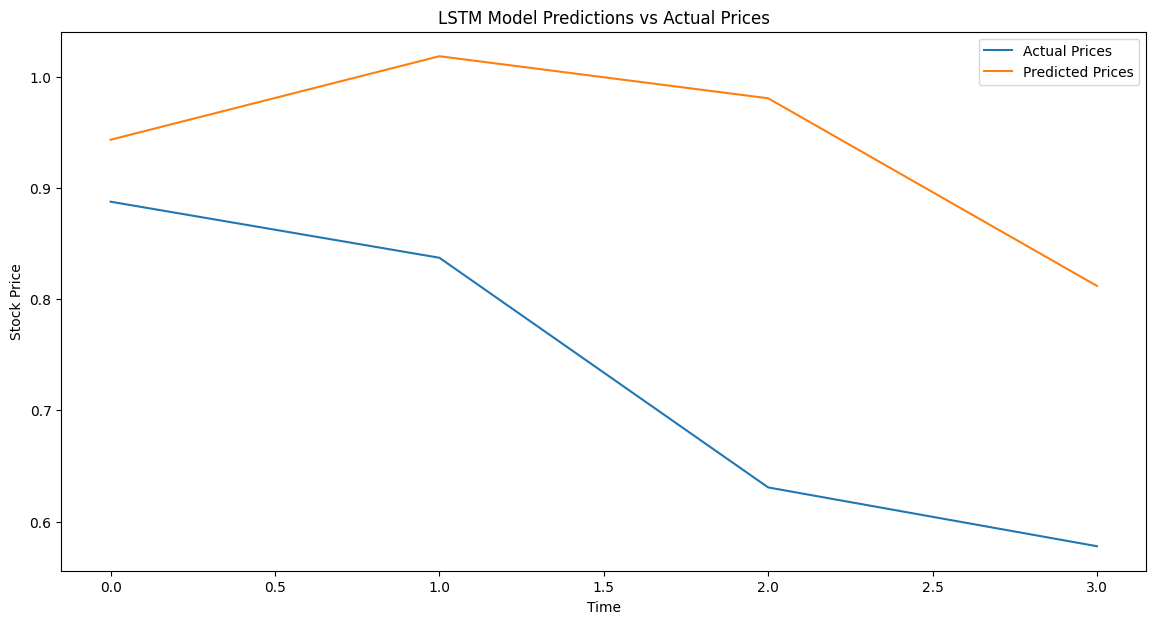

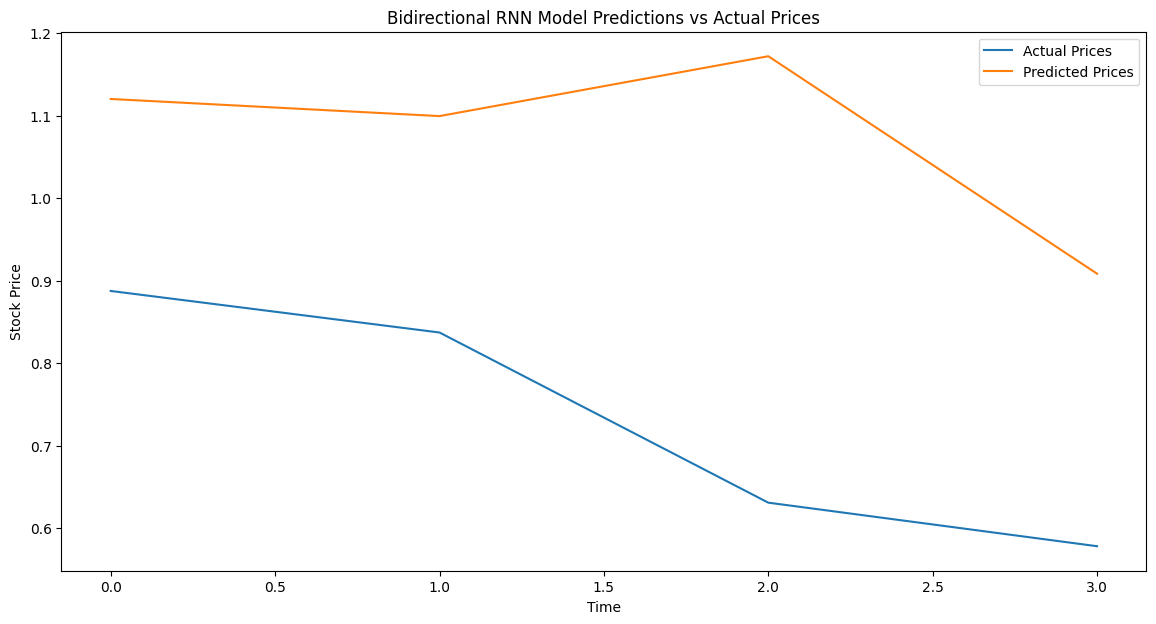

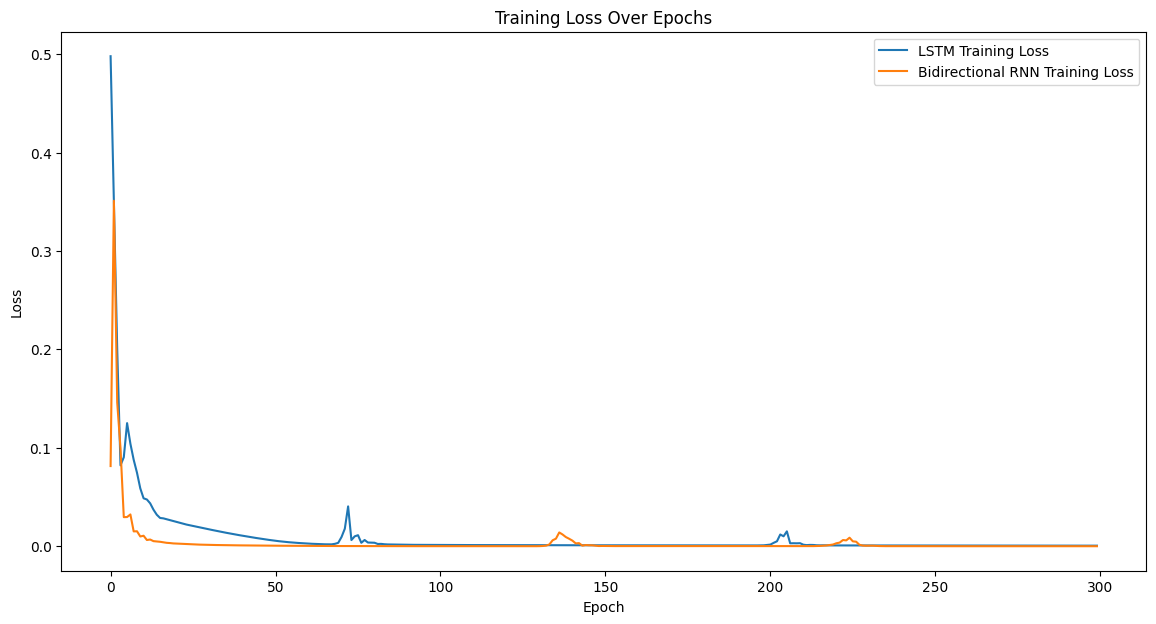

In [40]:
# Function to evaluate model performance
def evaluate_model(model, test_loader):
    model.eval()
    with torch.no_grad():
        predictions, actuals = [], []
        for inputs, targets in test_loader:
            outputs = model(inputs)
            predictions.append(outputs.numpy())
            actuals.append(targets.numpy())
    return np.concatenate(predictions), np.concatenate(actuals)

# Evaluate LSTM model
lstm_predictions, lstm_actuals = evaluate_model(model, test_loader)
lstm_mse = np.mean((lstm_predictions - lstm_actuals)**2)
print(f'LSTM Model MSE: {lstm_mse:.4f}')

# Evaluate Bidirectional RNN model
bi_rnn_predictions, bi_rnn_actuals = evaluate_model(bi_model, test_loader)
bi_rnn_mse = np.mean((bi_rnn_predictions - bi_rnn_actuals)**2)
print(f'Bidirectional RNN Model MSE: {bi_rnn_mse:.4f}')
import matplotlib.pyplot as plt

# Function to plot predictions vs actual values
def plot_predictions(actual, predictions, title):
    plt.figure(figsize=(14, 7))
    plt.plot(actual, label='Actual Prices')
    plt.plot(predictions, label='Predicted Prices')
    plt.title(title)
    plt.xlabel('Time')
    plt.ylabel('Stock Price')
    plt.legend()
    plt.show()

# Plot LSTM model predictions
plot_predictions(lstm_actuals, lstm_predictions, 'LSTM Model Predictions vs Actual Prices')

# Plot Bidirectional RNN model predictions
plot_predictions(bi_rnn_actuals, bi_rnn_predictions, 'Bidirectional RNN Model Predictions vs Actual Prices')
# Function to plot training losses
def plot_losses(lstm_losses, bi_rnn_losses):
    plt.figure(figsize=(14, 7))
    plt.plot(lstm_losses, label='LSTM Training Loss')
    plt.plot(bi_rnn_losses, label='Bidirectional RNN Training Loss')
    plt.title('Training Loss Over Epochs')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend()
    plt.show()

# Plot the training losses
plot_losses(lstm_losses, bi_rnn_losses)